<a href="https://colab.research.google.com/github/miguelamda/DeepLearningMII/blob/main/3_fundamentos_practicos/Practica_3.1_intro_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRÁCTICA 3.1. INTRODUCCIÓN A PYTORCH

Para esta primera práctica, asumiremos que ya has revisado el contenido del módulo 2, adquiriendo así los fundamentos teóricos básicos de las redes neuronales artificiales, por lo que nos centraremos en ver cómo plasmar esos conocimientos en código ejecutable mediante PyTorch.

PyTorch es un framework de código abierto para el aprendizaje profundo (Deep Learning). Destaca por su flexibilidad "Pythónica", su eficiencia en el cálculo de **tensores** (estructuras de datos similares a los arrays de NumPy pero optimizadas para GPU, como veremos en el siguiente módulo) y sus **grafos computacionales** dinámicos. Esta última característica simplifica la depuración y ofrece mayor libertad al construir modelos complejos. Es un proyecto de código abierto desarrollado dentro de la *Linux Foundation*, principalmente por *Meta AI* y grandes aportaciones de otras empresas como *NVIDIA*.

## 0. Objetivos
* Introducción del concepto de **Tensor**
* Creación de una red neuronal con nivel de programación 1, solo mediante tensores
* Introducción al bucle de entrenamiento de PyTorch.
* Descarga de un dataset y carga en tensores.

## 1. ¿Cómo funciona y cómo se instala?

Pero antes, para instalar PyTorch, la forma más sencilla es visitar su página oficial (pytorch.org). Allí, selecciona tu sistema, gestor de paquetes (pip o conda), versión de Python y, lo más importante, si usarás CPU o GPU (CUDA/ROCm). La web te proporcionará el comando exacto. Si vas a usar una GPU con CUDA, se debe instalar una versión del driver de NVIDIA compatible con la GPU instalada, para ello consulta su [Compute Capability](https://developer.nvidia.com/cuda-gpus) y qué [versión del driver](https://docs.nvidia.com/datacenter/tesla/drivers/index.html) de CUDA lo soporta. Por ahora trabajaremos usando la CPU y en la próxima práctica veremos cómo usar una GPU.

Alternativamente, puedes usar plataformas en la nube con todo pre-instalado, como por ejemplo las siguientes opciones con versiones gratuitas:

* [*Google Colaboratory*](https://colab.google/) (Colab): mejor opción para la mayoría de usuarios, experimentos rápidos, tutoriales, proyectos de portafolio y educación. Ofrece un entorno Jupyter Notebook totalmente gratuito que proporciona acceso a GPUs (Tesla T4, L4 o A100) y TPUs de Google. Se integra bien con Google Drive (15GB si tienes cuenta de Google gratuita). La versión gratuita tiene un tiempo límite por sesión (12 horas), y el acceso a una GPU no está garantizado siempre. Existe una versión de [pago](https://colab.research.google.com/signup) (Colab Pro/Pro+) que ofrece más recursos y tiempos de ejecución más largos.
* [*Kaggle Code*](https://www.kaggle.com/docs/notebooks) (Notebooks de Kaggle): mejor para competiciones de ciencia de datos, aprendizaje, compartir código y colaborar. Ofrece un entorno de Jupyter Notebook que proporciona acceso gratuito a GPUs P100 (algo antiguas pero funcionales) y CPUs. Kaggle es una plataforma excelente para encontrar datasets y aprender de la comunidad. Por supuesto, tiene una limitación similar a Colab para el tiempo de ejecución y recursos disponibles, aunque las especificaciones pueden variar.
* [*Paperspace DigitalOcean*](https://www.paperspace.com/pricing): en esta plataforma puedes crear proyectos Notebook gratuitos con una GPU básica (p.ej. RTX4000), con límites de tiempo de hasta 6 horas. Al ser estudiante, puedes reclamar 200$ en créditos en DigitalOcean a través del GitHub Student Developer Pack.

Una vez instalado, o usando una plataforma en la nube, podemos cargar PyTorch así:


In [ ]:
import torch

In [ ]:
# Veamos la versión que tenemos disponible
print (torch.__version__)

2.3.0+cu121


## 2. Introducción a los Tensores

Antes de empezar a construir este primer ejemplo, veamos con más detenimiento el concepto de **tensor**. Un tensor es un contenedor de datos, usualmente números. Por ejemplo, una matriz es un tensor de 2 dimensiones. Los tensores son generalizaciones de las matrices a un número arbitrario de dimensiones (el nombre de tensor viene en realidad de la física). En el contexto de tensores, una dimensión se denomina eje (axis).

Un tensor se define por 3 atributos principales:
* Número de ejes o rango (**rank**). Por ejemplo, una matriz o tensor 2D itene 2 ejes.
* Forma (**shape**). Una tupla de enteros que describen cuantas dimensiones tiene el tensor en cada eje. Un escalar tiene un shape igual a (). Una matriz de 3x4 tiene un shape (3, 4).
* Tipo de dato (**dtype**). Es el tipo de dato contenido en el tensor, por ejemplo `float32` (número real de 32 bits), `uint8` (entero sin signo de 8 bits), `float16` (número real de media precisión, 16 bits), etc. Normalmente no hay tensores de cadenas de texto, ya que los tensores viven en segmentos de memoria pre-reservados y contiguos. Puedes ver los tipos de datos soportados [aquí](https://docs.pytorch.org/docs/stable/tensors.html). Más adelante veremos cómo cambiar el tipo de dato.

### 2.1. Creación de tensores

Existen varios métodos básicos para crear tensores de un tamaño personalizado:

In [ ]:
# tensor con ceros
zeros = torch.zeros(2, 3)
print(zeros)

# tensor con unos
ones = torch.ones(2, 3)
print(ones)
print('El shape de ones es:')
print(ones.shape)

# tensor inicializado aleatoriamente.
# Podemos fijar una semilla para que simpre sean los mismos:
# torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

# crea un tensor desde listas de Python
constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(constants)

# existen versiones de los métodos anteriores pero con _like
# para indicar que queremos un tensor con la misma forma que otro
constants_zeros = torch.zeros_like(constants)
constants.shape == constants_zeros.shape

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
El shape de ones es:
torch.Size([2, 3])
tensor([[0.7150, 0.0523, 0.9320],
        [0.3861, 0.8490, 0.3992]])
tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])


True

**Ejercicio:** crea a continuación un tensor con rango 3 y forma (2,3,2), y observa cómo se distribuyen los datos.

### 2.2 Operaciones

También podemos hacer operaciones aritméticas y lógicas con tensores y escalares, y con tensores y tensores.

In [ ]:
# Sumar un escalar
ones = torch.zeros(2, 3) + 1
# Multiplicar un escalar
twos = torch.ones(2, 3) * 2
# Combinación
threes = (torch.ones(2, 3) * 7 - 1) / 2
# Potencias
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

# Suma de tensores
fives = ones + fours
print(fives)

# Traspuesta de un tensor
twos_T = twos.T
print (twos_T)

# Multiplicación matricial
sixes = ones @ twos_T
print (sixes)

# Multiplicación elemento a elemento
dozens = threes * fours
print(dozens)

# Potencia con tensores (por elemento)
powers2 = twos ** torch.tensor([[1, 2, 3], [4, 5, 6]])
print(powers2)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])
tensor([[1.4142, 1.4142, 1.4142],
        [1.4142, 1.4142, 1.4142]])
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[6., 6.],
        [6., 6.]])
tensor([[12., 12., 12.],
        [12., 12., 12.]])
tensor([[ 2.,  4.,  8.],
        [16., 32., 64.]])


Cuando dos tensores tienen distinta dimensionalidad (shape), aún se pueden hacer operaciones con ellos, ya que el más pequeño se agranda automáticamente, replicando las dimensiones faltantes para ajustarse al más grande. Esto se llama **broadcasting**. Por supuesto, esto tienes algunas restricciones:

* Si el shape es distinto, se añaden dimensiones de tamaño 1 por la izquierda. Por ejemplo, si el tensor es (5,3) y el otro (3), éste se extiende a (1,3)
* Si el shape es igual pero las dimensiones son distintas, solo se puede hacer broadcasting si en las dimensiones distintas, una de ellas es de tamaño 1. En tal caso, esa dimensión se extiende hasta llegar al más grande. Por ejemplo, si tenemos (5,3) y (1,3), éste último se extiende a (5,3). Esto se hace replicando los valores que ya hay en el tensor.

Por supuesto, esto no se hace directamente en memoria, sino que el broadcasting se hace forma virtual específicamente para la operación que lo requiere.

In [ ]:
tensorA = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape (2, 3)
tensorB = torch.tensor([100, 200, 300])           # Shape (3,)

print (tensorA + tensorB)  # Broadcasting de B hasta conseguir shape (2, 3)

tensor([[101, 202, 303],
        [104, 205, 306]])


### 2.3 Indexado de datos

Además de poder acceder a un valor en concreto dentro del tensor, también podemos obtener partes o secciones del tensor, mediante el uso de índices. Cabe recordar que los índices comienzan en 0, al igual que con otros contenedores de Python como las listas.

In [ ]:
# El tensor al completo
print(powers2)

# El primer elemento, en la primera fila y primera columna
print(powers2[0,0])

# Todas las filas a partir de la primera
print(powers2[1:])

# La segunda columna
print(powers2[:,1])

# A partir de la segunda columna
print(powers2[:,1:])

tensor([[ 2.,  4.,  8.],
        [16., 32., 64.]])
tensor(2.)
tensor([[16., 32., 64.]])
tensor([ 4., 32.])
tensor([[ 4.,  8.],
        [32., 64.]])


La realidad detrás de los tensores es que una vez se crean, los datos en bruto no se modifican. Los índices se emplean como modo de acceder a los datos, da igual si se cambian las dimensiones o la forma del tensor, los datos siguen estando igual pero la forma de acceder cambia. De hecho, hay operaciones que permiten reinterpretar un tensor con una forma distinta.

In [ ]:
# tensor original
print(tensorA)
# tensor reinterpretado con otras dimensiones
print(tensorA.reshape(3,2))
# la transpuesta de un tensor, distinto a lo anterior
print(tensorA.T)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


Finalmente, una operación muy útil (como ya veremos) es añadir o eliminar dimensiones al tensor. Siempre que sea la nueva dimensión tenga un tamaño de 1, la cantidad de datos será la misma (piénsalo, un tensor (2,2) tiene la misma cantidad de elementos que uno de (1,2,2)).

In [ ]:
print(powers2.shape)

# Añade una nueva dimensión en la posición indicada, en este caso en la 0
# moviendo el resto a las posiciones 1, 2 y 3 respectivamente
powers2ext = powers2.unsqueeze(0)

# Veamos cómo queda el shape
print(powers2ext.shape)
# Observa a continuación dónde se añade la nueva dimensión
print(powers2.unsqueeze(1).shape)
print(powers2.unsqueeze(2).shape)
print(powers2.unsqueeze(-1).shape) # añade por el final

# Podemos deshacer la operación eliminando una dimensión de tamaño 1
print(powers2ext.squeeze().shape)

# Finalmente, observa cómo queda el tensor después de añadir 1 dimensión,
# ¿dónde se han añadido los nuevos corchetes?
powers2ext

torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])
torch.Size([2, 3, 1])
torch.Size([2, 3])


tensor([[[ 2.,  4.,  8.],
         [16., 32., 64.]]])

## 3. Descarga del conjunto de datos MNIST

Para este primer ejemplo, vamos a usar el clásico dataset llamado [MNIST](https://yann.lecun.com/exdb/mnist/index.html), que consiste en 70.000 imágenes en blanco y negro de dígitos escritos a mano (entre 0 y 9).

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="300px" />

Usaremos [pathlib](https://docs.python.org/3/library/pathlib.html) para usar rutas en Python y la descarga la haremos con [requests](http://docs.python-requests.org/en/master/). Aunque veremos que este dataset ya viene predefinido en otra librería de PyTorch, este primer ejemplo pretende mostrar cómo podemos descargar datasets de forma manual y mapearlos con tensores para poder entrenar modelos.


In [ ]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)  # creamos la carpeta

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists(): # evitamos descargar si ya se ha descargado
        content = requests.get(URL + FILENAME).content  # descargamos el fichero
        (PATH / FILENAME).open("wb").write(content)

Este dataset está en formato **array** de **numpy**, y se ha guardado usando **pickle**, un formato específico de python para serializar datos. Normalmente usamos `X` para denominar los ejemplos (en este caso, las imágenes), e `Y` para las etiquetas (los números a los que corresponde cada imagen). El dataset también viene ya particionado en 50.000 imágenes para train, 10.000 para validación y 10.000 para test. A continuación descomprimimos el dataset (estaba en formato .gz) y de-serializamos los datos solo para train y valid (por ahora dejaremos fuera a test).

In [ ]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:  # descomprimimos el fichero en f
        ((x_train_np, y_train_np), (x_valid_np, y_valid_np), _) = pickle.load(f, encoding="latin-1") # cargamos los datos serializados

In [ ]:
x_train_np.shape

(50000, 784)

In [ ]:
x_valid_np.shape

(10000, 784)

Como puedes ver, hemos cargado una matriz de 50.000 filas (cada imagen) con 784 columnas (pixeles de cada imagen). Esto es así porque cada imagen es una matriz de 28 x 28 pixeles, y se almacena de forma aplanada (`flattened`, es decir, una fila tras otra), por lo que tenemos 28x28=784 elementos en total por imagen. Veamos la primera imagen (fila 0).

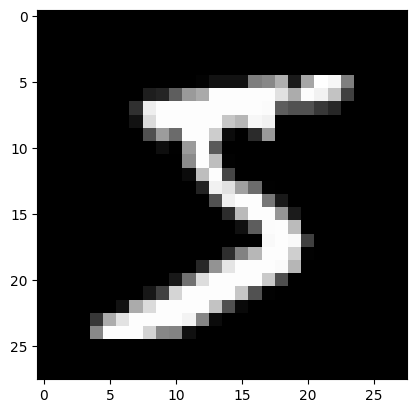

In [ ]:
from matplotlib import pyplot
import numpy as np

# Necesitamos cambiar la forma de la matriz a 28x28
pyplot.imshow(x_train_np[0].reshape((28, 28)), cmap="gray")
try:
    import google.colab  # si estamos en google colab, no es necesario la siguiente línea
except ImportError:
    pyplot.show()

El número mostrado en la imagen parece un 5, comprobemos que es así consultando su etiqueta:

In [ ]:
y_train_np[0]

5

**Ejercicio:** Prueba a visualizar otras imágenes del conjunto de entrenamiento, así como del conjunto de validación (`x_valid`), en la siguiente celda:

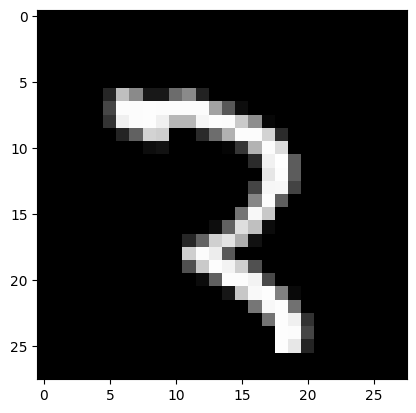

El número corresponde a un  3


In [ ]:
## EJERCICIO

x_ej1 = x_train_np  # 1. cambia x_train_np por x_valid_np
y_ej1 = y_train_np  # 2. cambia y_train_np por y_valid_np
img_ej1 = 500    # 3. cambia el número por otro

pyplot.imshow(x_ej1[img_ej1].reshape((28, 28)), cmap="gray")
try:
    import google.colab
except ImportError:
    pyplot.show()

print('El número corresponde a un ', y_train_np[img_ej1])

PyTorch usa para los tensores el tipo de dato `torch.tensor` en vez de arrays de numpy, así que necesitamos convertir los datos a este formato.

In [ ]:
import torch

# map equivale a realizar un bucle que recorra los elementos
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train_np, y_train_np, x_valid_np, y_valid_np)
)


In [ ]:
n, c = x_train.shape
# previsualizamos el tensor x_train (no será completo)
print(x_train)
# La forma del tensor
print(x_train.shape)
# El tipo de dato en el tensor
print(x_train.dtype)
# Previsualizamos Y_train
print(y_train)
# Con .item() sacamos el valor de un tensor (mira la diferencia entre min y max)
print('El valor mínimo y máximo de las etiquetas son ',y_train.min(), ' y ', y_train.max().item())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([50000, 784])
torch.float32
tensor([5, 0, 4,  ..., 8, 4, 8])
El valor mínimo y máximo de las etiquetas son  tensor(0)  y  9


**Ejercicio:** Accede al primer tensor que corresponde a la primera imagen del conjunto de entrenamiento `x_train`. A continuación, calcula el tipo de dato con el que está codificado, el valor mínimo, el máximo, y el tamaño `size` del tensor. Puedes ver la solución en la celda oculta abajo.

In [ ]:
# Tensor de la primera imagen de x_train
x0 = FIXME
# Tipo de dato
print(x0.FIXME)
# Mínimo, máximo y size
print(x0.FIXME)
print(x0.FIXME)
print(x0.FIXME)

In [ ]:
# @title
# Solución
# Tensor de la primera imagen de x_train
x0 = x_train[0]
# Tipo de dato
print(x0.dtype)
# Mínimo, máximo y size
print(x0.min().item())
print(x0.max().item())
print(x0.size())

Podemos ver que el tipo de dato con el que codificamos los valores de los píxeles de las imágenes de entrada es el `float32`: punto flotante de 32 bits. En realidad, cualquier formato de compresión de imágenes tratará cada pixel como un `uint8`, es decir, valores entre 0 y 255. Sin embargo, el dataset que hemos descargado es una serialización preparada para ser usado en machine learning. Por tanto, ya hemos recibido los valores previamente normalizados en el rango $[0,1]$.

## 4. Primera red neuronal básica con tensores

Ahora que ya sabes cómo operar de forma básica con tensores, vamos a construir una primera red neuronal, que será un simple modelo lineal, y veremos cómo PyTorch incluye herramientas para hacer la retropropagación de gradientes.

### 4.1. Definición del modelo
Vamos a hacer un primer modelo lineal en Pytorch con simples operaciones tensoriales, usando tensores para representar los pesos `weights` y el bias `bias`: `y_hat = X*weights+bias`, donde `y_hat` será la predicción de la variable `Y`. En concreto, el modelo tan solo tendrá:
* una capa de entrada: 784 neuronas, ya que cada imagen de entrada tiene 28x28=784 píxeles
* una capa de salida: 10 neuronas, uno para cada posible clase o categoría, en este caso para cada posible dígito del 0 al 9.

Los pesos por tanto serán de cada conexión entre una neurona de entrada y una de salida, es decir, 784*10.

<img src="https://s3.amazonaws.com/media-p.slid.es/uploads/970798/images/5546082/ezgif.com-video-to-gif__1_.gif" />


Ahora vamos a añadir algo nuevo en la creación de tensores, vamos a indicar a PyTorch que hay que calcular gradientes en los tensores, con `requires_grad`. Esto hará que PyTorch grabe todas las operaciones que se hagan sobre ese tensor, para que después podamos hacer la retro-propagación de forma automática. Observa a continuación que:

* para los pesos, indicamos `requires_grad` después de inicializarlo, ya que no queremos que ese paso (la división por la raíz cuadrada de 784) se registre en el gradiente. En PyTorch, añadir un `_` al final del nombre de la función indica que la operación modifica los valores de la variable.
* para el bias sí que podemos indicar `requires_grad` en el momento de inicializarlo.



In [ ]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

**Ejercicio**: ¿Qué tipo de inicialización estamos haciendo a los pesos?
<details>
<summary>Click aquí para ver solución</summary>
    Estamos haciendo la inicialización Xavier, ya que multiplicamos por `1/sqrt(n)`, con `n` el número de conexiones de entrada.
</details>

### 4.2. Función de activación en capa de salida
PyTorch se integra perfectamente con Python, de tal forma que podemos usar cualquier función estándar de este lenguaje (o un objeto "callable") como un modelo, ya que los gradientes se computan automáticamente siempre y cuando los datos sean tensores de PyTorch.

Por otro lado, vamos a definir la función de activación de la *capa de salida*. Ya hemos visto en los temas de la asignatura que cuando trabajamos con clasificación multiclase, la función de activación más común es **Sofmax**. Como recordatorio, softmax se puede interpretar como una probabilidad de salida que indica lo probable que es que la imagen de entrada tenga cada una de las etiquetas como salida.

Sin embargo, el cálculo de esta función suele ser costosa computacionalmente, ya que requiere operaciones como el exponente y la división. Es por ello que en PyTorch se suele utilizar una variante, la función de activación **[log softmax](https://www.baeldung.com/cs/softmax-vs-log-softmax)**, la cual tiene una mejor estabilidad numérica (en cuestión de precisión decimal) y es algo más ligera de calcular. Esta función se define como:
$$
\text{log\_softmax}(x_i) = \log(\text{softmax}(x_i)) = \log\left(\frac{e^{x_i}}{\sum_j e^{x_j}}\right) = x_i - \log\left(\sum_j e^{x_j}\right)
$$
Es decir, `log_softmax (x_i) = x_i - log(sum(exp(x_j)))`, donde para cada valor `x_i` le restamos el logaritmo de la suma de todos los valores x_j (resto de valores). Aunque estas funciones de activación ya existen en PyTorch, vamos a demostrar que podemos implementarlo a mano y además es eficiente, ya que automáticamente se creará una versión compilable.


In [ ]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

**Ejercicio opcional**: Puedes entender cómo se implementa log_softmax con `x.exp().sum(-1).log().unsqueeze(-1)` si vas añadiendo cada operación una a una sobre un tensor simple. Ejecútalo a continuación y comenta al lado de cada línea qué ha hecho:

In [ ]:
## EJERCICIO
sample = torch.tensor([[1,1,1],[2,2,2]])

print(sample)  # el vector de entrada
print(sample.exp())   # Aplica e^x para cada valor x en samples
print(sample.exp().sum(-1))   # ...
print(sample.exp().sum(-1).log())   # ...
print(sample.exp().sum(-1).log().unsqueeze(-1))    #...

tensor([[1, 1, 1],
        [2, 2, 2]])
tensor([[2.7183, 2.7183, 2.7183],
        [7.3891, 7.3891, 7.3891]])
tensor([ 8.1548, 22.1672])
tensor([2.0986, 3.0986])
tensor([[2.0986],
        [3.0986]])


Finalmente, definimos el modelo lineal, el cual es simplemente la multiplicación matricial (operador `@`) entre la entrada y los pesos, más el bias, pasado por la función de activación.

In [ ]:
def model(xb):
    return log_softmax(xb @ weights + bias)

Vamos a usar el modelo para hacer inferencia sobre un batch de 64 elementos. Por ahora, las predicciones serán aleatorias.

In [ ]:
batch = 64  # batch size

xb = x_train[0:batch]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.1271, -2.8384, -1.9378, -2.6151, -2.7322, -2.1581, -2.2669, -1.7190,
        -2.3860, -3.0034], grad_fn=<SelectBackward0>) torch.Size([64, 10])


El tensor resultado de la predicción, `preds`, contiene también una función de gradiente (`grad_fn`). Esta función se utilizará para realizar la retropropagación.

### 4.3. Función de pérdida y métrica de evaluación

A continuación vamos a implementar la función de pérdida *logaritmo-verosimilitud negativa* (NLL, o negative log-likelihood), la cual se deriva de la fórmula vista en los temas para clasificación multiclase, asumiendo que solo puede haber una clase válida para cada ejemplo. Además, esta función de pérdida asume que las entradas son los valores después de aplicar el logaritmo softmax. La fórmula es:

$$
\ell(x, y) = \text{media}(\{l_1, \dots, l_N\}), \quad \text{siendo } l_i = -x_{i,y_i}
$$

donde
* N es el número de ejemplos (e.g. tamaño del batch)
* y es un tensor con N elementos, con valores entre 0 y C-1. $y_i$ representa la clase correcta para el ejemplo $i$-ésimo.
* x es un tensor de rango 2, con N filas y C columnas, donde:
    * cada fila es el valor predicho por el modelo para cada ejemplo, que consiste en un vector de C valores, uno por cada clase.
    * asumimos que **a cada fila de x le hemos aplicado log_softmax**.
    * $x_{i,j}$ es el valor en la fila i y columna j. Es decir, es la predicción que hace el modelo de que el ejemplo $i$ pertenezca a la clase $j$. Así que, $x_{i,y_i}$ es la probabilidad con la que cree el modelo que el ejemplo i pertenezca a la clase correcta (es decir, cómo de bien lo ha hecho para ese ejemplo).


In [ ]:
def nll(input, target):
    # Para evitar problemas por si input tiene más elementos que target
    # en vez de usar ":" en la primera dimensión, usamos range(target.shape[0])
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

Hagamos una prueba rápida con el primer batch. Esto mejorará cuando entrenemos el modelo, recuerda que buscaremos reducir el valor:

In [ ]:
yb = y_train[0:batch]
print(loss_func(preds, yb))

tensor(2.3465, grad_fn=<NegBackward0>)


In [ ]:
yb.shape[0]
preds.shape[0]

64

PyTorch es un entorno de bajo/medio nivel, buscando una API no demasiado extensa, dando más bien libertad al usuario para que defina sus propias funciones. Por este motivo, en PyTorch tenemos que definir nuestra propia función de **accuracy**, el cual nos dará un valor más interpetable para nosotros que la función de pérdida, pero que no sirve para entrenar un modelo. Será la suma ponderada de las veces que el modelo acierta a la hora de predecir la clase de un ejemplo:

In [ ]:
def accuracy(out, yb):
    # la predicción es la clase del valor más alto
    # como tenemos un batch, hay que aplicarlo a través de la dimensión de cada ejemplo
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

print(accuracy(preds, yb))

tensor(0.1406)


Efectivamente, al ser un modelo aleatorio, y al haber 10 clases, esperamos obtener alrededor de un 1/10 = 0.10 = 10% de precisión. Esto se conoce como el "random baseline". Por cierto, es posible que cada vez que ejecutes este notebook desde cero obtengas un valor distinto, ¿por qué?

Vamos a mejorarlo entrenando el modelo.

### 4.4. Bucle de entrenamiento

Primero, vamos a definir un paso (**época**) del bucle de entrenamiento, dentro de una nueva función llamada `train`. Éste se estructura de la siguiente forma:
* seleccionamos un mini-batch de tamaño `bs`
* usamos el modelo para hacer predicciones
* calculamos la pérdida
* `loss.backward()` actualizará los gradientes del modelo (de `weights` y de `bias`). Si te lo preguntas, la función loss sabe cómo hacerlo porque lo hace a través de las predicciones que el modelo ha generado, cuyos gradientes ya vienen enlazados con los parámetros del modelo (como dijimos al comenzar esta sección). Recuerda, la retropropagación comienza en la función de pérdida, y de ahí vamos propagando los gradientes.
* Usamos los gradientes para actualizar los parámetros (`weights` y `bias`). Est aactualización no debe registrarse como operaciones a registrar para propagación de gradientes, por lo que usamos el contexto `torch.no_grad()`.
* Finalmente, reiniciamos los gradientes a cero con `.grad.zero_()` para la siguiente iteración. Si no se hace esto, estaríamos siempre acumulando los gradientes entre las iteraciones.


In [ ]:
bs = 64   # tamaño del batch
lr = 0.5  # factor de aprendizaje (learning rate)

def train():
    steps = (n - 1) // bs + 1  # número de iteraciones en una época
    lossAcum = 0  # variables para acumular loss y acc durante la época
    accuAcum = 0  # y mostrar el resultado al final de la época

    for i in range(steps):   # bucle para cada mini-batch
        start_i = i * bs       # donde empieza el mini-batch
        end_i = start_i + bs   # donde finaliza el mini-batch
        xb = x_train[start_i:end_i]  # extraemos ejemplos
        yb = y_train[start_i:end_i]  # extraemos etiquetas
        pred = model(xb)             # el modelo genera predicciones
        loss = loss_func(pred, yb)   # calculamos la pérdida

        loss.backward()              # retro-propagamos los gradientes

        with torch.no_grad():        # actualizamos pesos (no registramos gradientes!)
            global weights
            global bias
            weights -= weights.grad * lr    # regla de actualización simple, sin momentum
            bias -= bias.grad * lr
            weights.grad.zero_()     # reseteamos los gradientes a cero
            bias.grad.zero_()

        lossAcum += loss.item()   # sacamos el valor fuera del tensor
        accuAcum += accuracy(pred,yb).item()  # sacamos el valor fuera del tensor

    # Imprimimos la media de loss y acc en toda la época
    print('Entrenamiento - Loss: {:.4f} Accuracy: {:.4f}'.format(lossAcum/steps, accuAcum/steps))

Después de una época, comprobamos cómo se comporta el modelo con el conjunto de validación. Esto lo hacemos con una nueva función más simple que la anterior, donde no hacemos la fase de backward, sino solo de forward.

**Ejercicio:** A continuación, corrije los FIXME que veas en el código. Si te atascas, mira la solución abajo.

In [ ]:
def validate():
    lossAcum = 0
    accuAcum = 0

    m = y_valid.FIXME   # tamaño del conjunto validación
    steps = (m - 1) // bs + 1  # número de iteraciones en una época

    with torch.FIXME(): # a continuación no registramos gradientes
        for i in range(FIXME):   # bucle para cada mini-batch
            start_i = i * bs       # donde empieza el mini-batch
            end_i = start_i + bs   # donde finaliza el mini-batch
            xb = x_valid[start_i:end_i]  # extraemos ejemplos
            yb = y_valid[start_i:end_i]  # extraemos etiquetas
            pred = model(FIXME)             # el modelo genera predicciones
            loss = loss_func(FIXME, FIXME)   # calculamos la pérdida

    #FIXME: añade con la identación correcta lossAcum += loss.item()
    #FIXME: añade con la identación correcta accuAcum += accuracy(pred,yb).item()

    print('Validación - Loss: {:.4f} Accuracy: {:.4f}'.format(lossAcum/steps, accuAcum/steps))

In [ ]:
# @title
#Solución

def validate():
    lossAcum = 0
    accuAcum = 0

    m = y_valid.shape[0]   # tamaño conjunto validación
    steps = (m - 1) // bs + 1  # número de iteraciones en una época

    with torch.no_grad(): # a continuación no registramos gradientes
        for i in range(steps):   # bucle para cada mini-batch
            start_i = i * bs       # donde empieza el mini-batch
            end_i = start_i + bs   # donde finaliza el mini-batch
            xb = x_valid[start_i:end_i]  # extraemos ejemplos
            yb = y_valid[start_i:end_i]  # extraemos etiquetas
            pred = model(xb)             # el modelo genera predicciones
            loss = loss_func(pred, yb)   # calculamos la pérdida

            lossAcum += loss.item()   # sacamos el valor fuera del tensor
            accuAcum += accuracy(pred,yb).item()  # sacamos el valor fuera del tensor

    print('Validación - Loss: {:.4f} Accuracy: {:.4f}'.format(lossAcum/steps, accuAcum/steps))

Y finalmente, el bucle de entrenamiento sería llamar a train y a valid en cada época. Si ejecutas más de una vez esta celda, estarías haciendo más épocas sobre el modelo, además de las ya hechas anteriormente (sería acumulativo). Si quieres empezar de cero otra vez, simplemente ejecuta la celda justo debajo, en la cual definimos de nuevo el modelo.

In [ ]:
epochs = 4

for epoch in range(epochs):
    print('Época: {}'.format(epoch))
    train()
    validate()

Época: 0
Entrenamiento - Loss: 0.3870 Accuracy: 0.8894
Validación - Loss: 0.3112 Accuracy: 0.9113
Época: 1
Entrenamiento - Loss: 0.3088 Accuracy: 0.9131
Validación - Loss: 0.2918 Accuracy: 0.9175
Época: 2
Entrenamiento - Loss: 0.2954 Accuracy: 0.9167
Validación - Loss: 0.2848 Accuracy: 0.9205
Época: 3
Entrenamiento - Loss: 0.2879 Accuracy: 0.9188
Validación - Loss: 0.2814 Accuracy: 0.9223


In [ ]:
# Ejectua las siguientes líneas SOLO si necesitas reiniciar el modelo
# para comenzar un entrenamiento desde cero otra vez

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

Vemos como han mejorado los valores a lo largo de las épocas, aunque parece que se queda estancado. Si embargo, la precisión conseguida es casi perfecta.

## 5. Conclusiones

En esta práctica has trabajado principalmente con el concepto de tensor, carga de datos y entrenamiento de un modelo lineal. Sin embargo, esta forma de trabajar directamente con tensores no es la que se suele utilizar, PyTorch da herramientas para trabajar a un mayor nivel de abstracción. Sí, lo hemos hecho por el camino difícil, pero de esta forma la siguiente práctica te resultará más sencilla de seguir. Considera hacer una comparativa ente el código de esta práctica y el de la siguiente para ver las diferencias que se introducirán. En definitiva, gracias a esta práctica has podido trabajar directamente con los tipos de datos básicos de PyTorch, los tensores.

## 6. Bibliografía

* [Tutorial de PyTorch](https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html), por Jeremy Howard (creador de fast.ai).
* [Introducción a los tensores de PyTorch](https://docs.pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html).
* [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch), Eli Stevens, Luca Antiga, Thomas Viehmann.